# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [2]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [3]:
# Read shapefile
ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

# -> GADM is not accurate in the barangay level for the Philippines.
# -> So we actually have the same files with different extensions. The main
# shape file is the .shp. This is what we try to open.
# -> But geopandas is smart enough to know that it will open everything with 
# the same exact file names.
# -> When we download shape files, it usually comes in a zip folder. Just 
# unzip it and make sure that all of the files with the same file name are in 
# the same folder. If there are files missing, it will be an OpenFailedError.

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [4]:
type(ph)

geopandas.geodataframe.GeoDataFrame

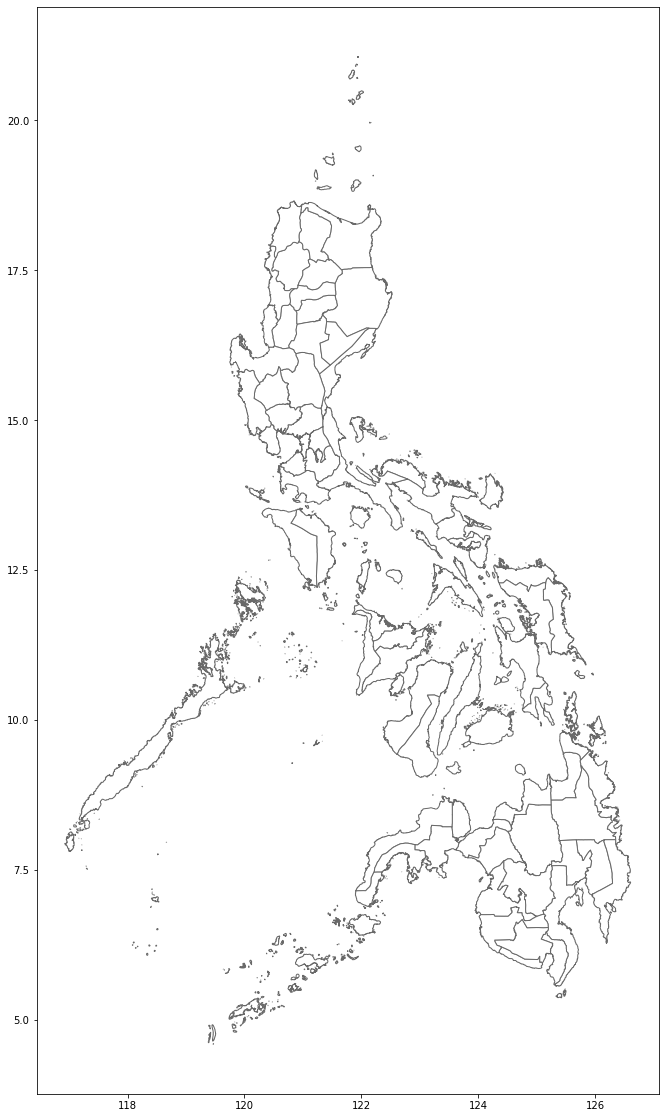

In [5]:
ax = ph.plot(figsize=(12,20), color="w", edgecolor="dimgray")
# ax.axis('off')

# -> axis('off') turns off the x and y axis. Without this, we would be
# able to check if the plot is really within the longitude and latitude of
# the Philippines
# -> Even if we set the figsize, the map would not be extended to that as
# it respects the aspect ratio of the map so it won't be deformed
# -> Geopandas is built in together with mathplotlib.

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [6]:
# Read GeoJSON file
healthsites = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,defining-hours,source_url,phone,what3words,upstream,name,completeness,uuid,date_modified,url,source,version,physical-address,type,email,geometry
0,None,http://www.openstreetmap.org/node/2694351354,None,chat.pints.mankind,openstreetmap¶n2694351354,20-1 Barangay Health Station,35.29%,e32de8829d524d60b40a55a2029b765f,2015-11-17T09:43:57.838001+00:00,None,OpenStreetMap,2,None,clinic,None,POINT (121.13735 14.56600)
1,None,http://www.openstreetmap.org/node/2141277725,None,shadow.vipers.modest,openstreetmap¶n2141277725,24hr Birthing Center,35.29%,116f9d20caa946ea969796092d79b0dc,2015-11-17T09:43:57.838001+00:00,None,OpenStreetMap,2,None,clinic,None,POINT (123.94312 10.33793)
2,None,http://www.openstreetmap.org/node/4020825463,None,caravan.flint.evicted,OpenStreetMap¶n4020825463,4m ultrasound,29.41%,6cbffaf7de0b49bd81eb99b58d291206,2016-02-26T15:58:36+00:00,None,OpenStreetMap,2,None,clinic,None,POINT (125.97913 8.50781)
3,None,http://www.openstreetmap.org/way/317862375,None,wildest.progress.chirped,openstreetmap¶w317862375,7thDayAdventistSanitariumHospital,35.29%,3225787941ba40e7ab8c81514ec1a16f,2015-12-11T10:51:22.924000+00:00,None,OpenStreetMap,2,None,hospital,None,POINT (124.56608 12.06808)
4,None,http://www.openstreetmap.org/way/266959244,None,chug.redhead.quickness,openstreetmap¶w266959244,81752,35.29%,ceaf253f77044fd28035a65bdb91ed14,2015-12-11T10:51:22.924000+00:00,None,OpenStreetMap,2,None,clinic,None,POINT (120.23383 14.87967)


### CSV

Sometimes we have data in a normal CSV file but it also contains geographic information in different columns. A common example would be having the longitude and latitude in two separate columns. Since we are aware that there is value in having the data as a geometric point, there is a way to convert two columns to a `Point` using `shapely`.

CitiBike Historical Trip Data: https://s3.amazonaws.com/tripdata/index.html

We should already have the a CitiBike trip data file from the previous lab.

In [7]:
# Read in the data using pandas

citibike = pd.read_csv(os.getenv('DSDATA') + '/201712-citibike-tripdata.csv')
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,256,2017-12-01 00:00:00,2017-12-01 00:04:17,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,262,Washington Park,40.691782,-73.973730,18858,Subscriber,1981.0,1
1,325,2017-12-01 00:00:17,2017-12-01 00:05:43,470,W 20 St & 8 Ave,40.743453,-74.000040,490,8 Ave & W 33 St,40.751551,-73.993934,19306,Subscriber,1992.0,1
2,967,2017-12-01 00:00:19,2017-12-01 00:16:26,347,Greenwich St & W Houston St,40.728846,-74.008591,504,1 Ave & E 16 St,40.732219,-73.981656,28250,Subscriber,1992.0,1
3,125,2017-12-01 00:00:20,2017-12-01 00:02:26,3077,Stagg St & Union Ave,40.708771,-73.950953,3454,Leonard St & Maujer St,40.710369,-73.947060,25834,Subscriber,1988.0,1
4,451,2017-12-01 00:00:28,2017-12-01 00:08:00,368,Carmine St & 6 Ave,40.730386,-74.002150,326,E 11 St & 1 Ave,40.729538,-73.984267,14769,Subscriber,1986.0,1


In [8]:
citibike.shape

(889967, 15)

<AxesSubplot:xlabel='start station latitude', ylabel='start station longitude'>

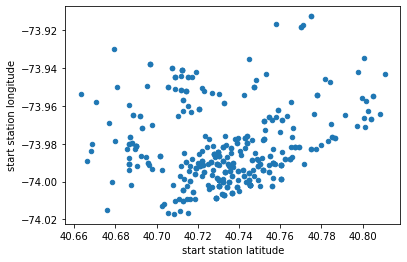

In [9]:
citibike.iloc[0:400].plot(x='start station latitude', y='start station longitude', kind='scatter')

# -> It's not following the aspect ratio, but it shows it like a map

Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

In [10]:
stations = citibike[['end station name', 'end station longitude', 'end station latitude']]

In [11]:
stations.shape

(889967, 3)

In [12]:
stations.drop_duplicates(inplace=True)
stations.shape

C:\Users\User\AppData\Local\Temp\ipykernel_7928\1586708187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations.drop_duplicates(inplace=True)


(758, 3)

In [13]:
# Create the geometry
geometry = [Point(xy) for xy in zip(stations['end station longitude'], 
                                    stations['end station latitude'])]
# -> Whenever we zip two values, it would just make the two values into
# a pair, so it would become a tuple.

# Set the crs
crs = {'init': 'epsg:4326'}

# Create the GeoDataFrame from the DataFrame
citi_gdf = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)
citi_gdf.head()

C:\Users\User\anaconda3\envs\geo-env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,end station name,end station longitude,end station latitude,geometry
0,Washington Park,-73.973730,40.691782,POINT (-73.97373 40.69178)
1,8 Ave & W 33 St,-73.993934,40.751551,POINT (-73.99393 40.75155)
2,1 Ave & E 16 St,-73.981656,40.732219,POINT (-73.98166 40.73222)
3,Leonard St & Maujer St,-73.947060,40.710369,POINT (-73.94706 40.71037)
4,E 11 St & 1 Ave,-73.984267,40.729538,POINT (-73.98427 40.72954)


In [14]:
citi_gdf = citi_gdf.to_crs(epsg=4326)

In [15]:
citi_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

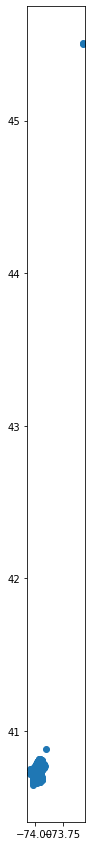

In [16]:
citi_gdf.plot (figsize=(20, 15))

# -> It's all bunched up together because there's an outlier, so it's zoomed
# out.

## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

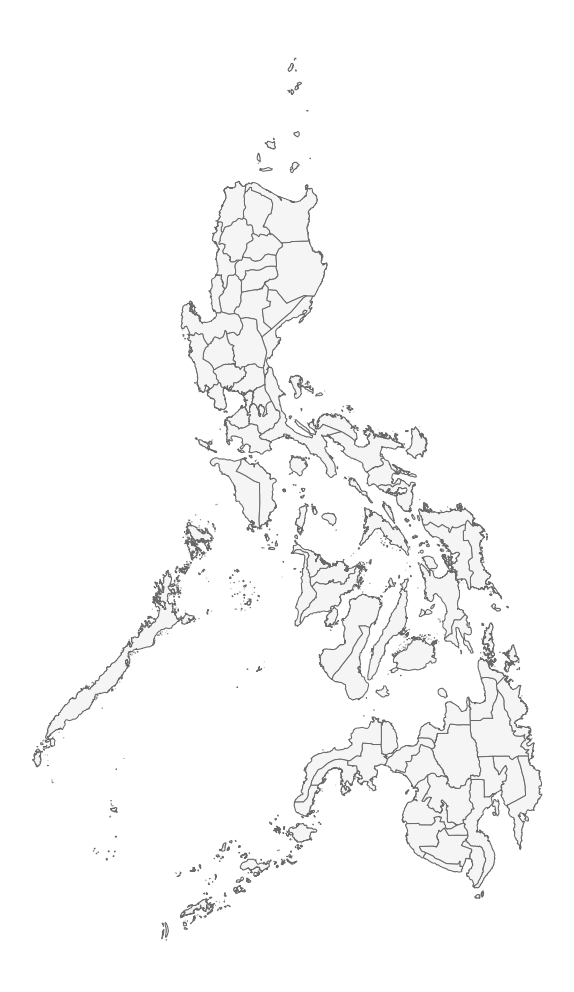

In [17]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

## Projections
Different datasets would have different projections to minimize the distortion depending on where they are on the globe. When doing spatial analysis, it is normal to be working with multiple datasets in different formats and different projections depending on how they were collected or how they should be presented.

Let us take the example of the New York City Taxi Zones and CitiBike stations. We already have the CitiBike stations from the example above.

- NYC Taxi Zones: https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

In [18]:
taxi = gpd.read_file(os.getenv('DSDATA') + '/taxi_zones/taxi_zones.shp')
taxi.crs

# -> We can see the information that we need (projection and axis info). 
# -> The x and y-axis is not within the range of -180 to 180/
# -> Proportion is within bounds.

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

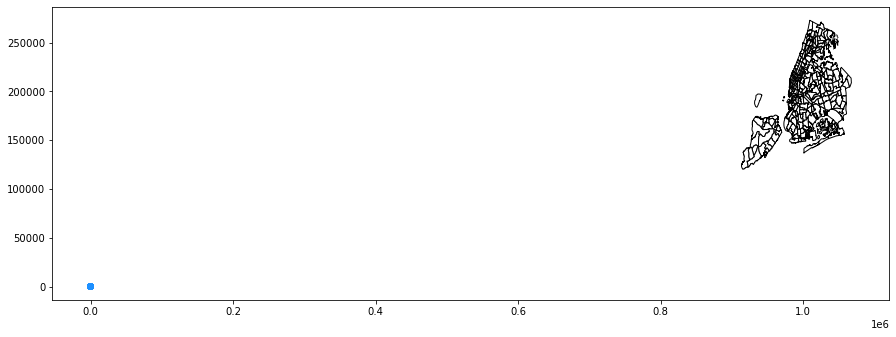

In [19]:
ax = taxi.plot(figsize=(15, 15), color='white', edgecolor='k')
# -> axis object which is a container for the visualization
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.3);
# -> We can see that the map from the taxi dataset has been minimized
# to the side and the data from the citibikes are in the bottom left, so
# it does not show within the map. This is because their CRS are different.

In [20]:
print('Taxizones CRS', taxi.crs)
print('Citi Bike CRS', citi_gdf.crs)
# -> So we need to make them the same, which is by converting one of them
# into the other's CRS.

Taxizones CRS epsg:2263
Citi Bike CRS epsg:4326


In [21]:
# First option is to pass a dictionary like how we initialized the citibike dataframe - this is the CRS
citi_gdf = citi_gdf.to_crs(epsg=2263)

# Another is to simply pass the code for the epsg through the epsg parameter
#citi_gdf = citi_gdf.to_crs(epsg=2263)

In [22]:
citi_gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

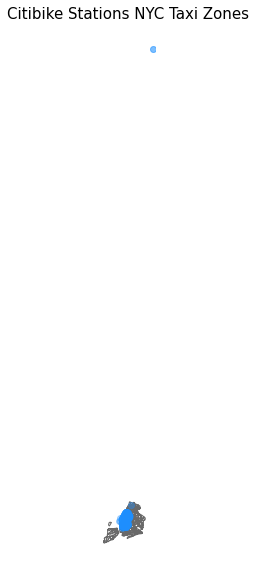

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations NYC Taxi Zones', fontsize=15)
# ax.set_ylim([110000,280000]) 
# -> would show the bike zones in the new york taxi zone more clearly
ax.axis('off');

# -> Now, the citibikes data are within the map of the taxi zone
# -> There's still a problem because there's a point far away and those
# that are not on the land. This can be solved by the spatial join

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Attribute join
This is when you merge two datasets based on a common column. Similar to how you would merge two regular `pandas DataFrame`s. 

**IMPORTANT**

When merging a `GeoDataFrame` and a `DataFrame`, it is important that the **left** `DataFrame` is the one with the geospatial data. Otherwise, the `GeoDataFrame` will turn into a regular `DataFrame` and lose all the features and functions of a `GeoDataFrame`.

**Data**
- World Population Data (World Bank): http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
- Countries shapefile: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

*Note: The countries shapefile is also available within geopandas through `gpd.datasets.get_path('naturalearth_lowres')` but this data seems to be outdated as it only has 177 rows.*

In [34]:
# Read in the shapefile from the download
world = gpd.read_file(os.getenv('DSDATA') + '/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


<AxesSubplot:>

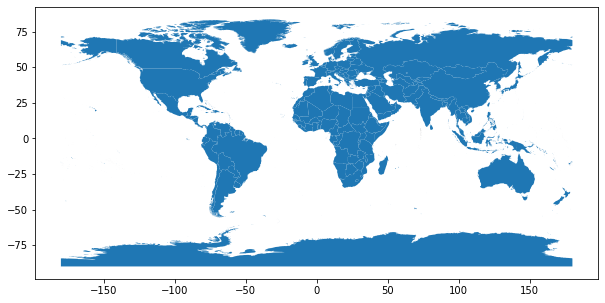

In [36]:
world.plot(figsize = (20, 5))

In [37]:
world.columns
# -> we can see that there are columns that are just repeated in different 
# languages, so they might be unncessary for our usecase
# -> In this case, it might be better to use a countrycode, since the
# country name is prone to errors. It's better to use international 
# standard columns.

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [35]:
population = pd.read_csv(os.getenv('DSDATA') + '/API_SP.POP.TOTL_DS2_en_csv_v2_1308146/API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv',
                         skiprows=3)
# -> skiprows = 3 means that the first three rows would be skipped when reading
# the csv files since they are unnecessary rows
population.dropna(axis=1, how='all', inplace=True)
print(len(population))
population.head(3)

264


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0


In [38]:
country_shapes = world[['ADMIN', 'ADM0_A3', 'geometry']]
type(country_shapes)
# -> We are only getting the infomration that we need

geopandas.geodataframe.GeoDataFrame

In [39]:
country_shapes.shape

(255, 3)

In [40]:
country_shapes.head()

,ADMIN,ADM0_A3,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [41]:
# Merge the two dataframes
# -> Here I used LEFT JOIN first to be able to get all the country shapes, so 
# all country_shapes would be shown and if there are no population data, 
# the population data would be null
# -> country_shapes should be first since the geodataframe should ALWAYS 
# go first
# -> We need to specify the left column that we want to match it with
# and the right column because the names do not match
# -> We can either ignore or drop the places without any population
country_pop = country_shapes.merge(population, left_on='ADM0_A3', right_on='Country Code', how='left')
country_pop.head()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,IDN,"Population, total",SP.POP.TOTL,87751068.0,90098394.0,92518377.0,...,241834215.0,245116206.0,248452413.0,251806402.0,255129004.0,258383256.0,261554226.0,264645886.0,267663435.0,270625568.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,MYS,"Population, total",SP.POP.TOTL,8156347.0,8417824.0,8692342.0,...,28208035.0,28650955.0,29068159.0,29468872.0,29866559.0,30270962.0,30684804.0,31105028.0,31528585.0,31949777.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,CHL,"Population, total",SP.POP.TOTL,8132990.0,8303811.0,8476897.0,...,17062536.0,17233576.0,17400347.0,17571507.0,17758959.0,17969353.0,18209068.0,18470439.0,18729160.0,18952038.0
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,BOL,"Population, total",SP.POP.TOTL,3656955.0,3728964.0,3802990.0,...,10048590.0,10212954.0,10377676.0,10542376.0,10706517.0,10869730.0,11031813.0,11192854.0,11353142.0,11513100.0
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,PER,"Population, total",SP.POP.TOTL,10155015.0,10446620.0,10749466.0,...,29027674.0,29264318.0,29506788.0,29773987.0,30090359.0,30470734.0,30926032.0,31444297.0,31989256.0,32510453.0


In [42]:
# However, looking at the tail of the dataset, we can see that there are certain areas that have no population data
country_pop.tail()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
250,Macao S.A.R,MAC,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...","Macao SAR, China",MAC,"Population, total",SP.POP.TOTL,167791.0,170462.0,176183.0,...,538219.0,550832.0,564039.0,577372.0,590208.0,602085.0,612836.0,622585.0,631636.0,640445.0
251,Ashmore and Cartier Islands,ATC,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Bajo Nuevo Bank (Petrel Is.),BJN,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Serranilla Bank,SER,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Scarborough Reef,SCR,"POLYGON ((117.75389 15.15437, 117.75569 15.151...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
type(country_pop)

geopandas.geodataframe.GeoDataFrame

(-197.99999999999991, 198.0, -62.8961344667999, 90.61173089680007)

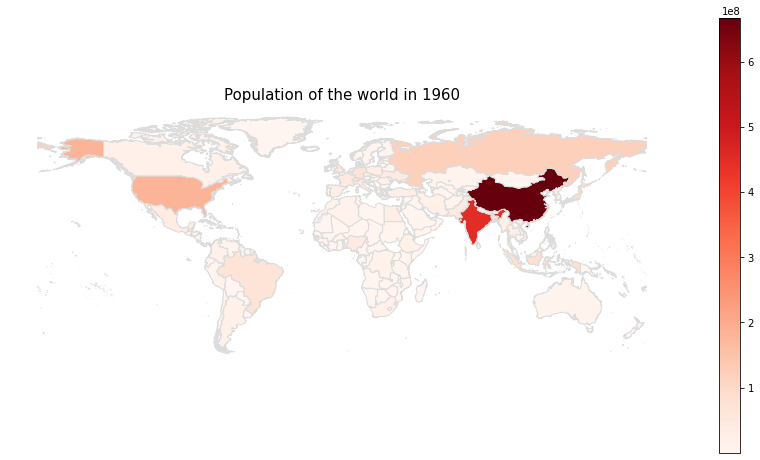

In [46]:
ax = country_pop.plot(figsize=(15,8), column='1960', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 1960', fontsize=15);
ax.axis(False)

(-197.99999999999991, 198.0, -62.8961344667999, 90.61173089680007)

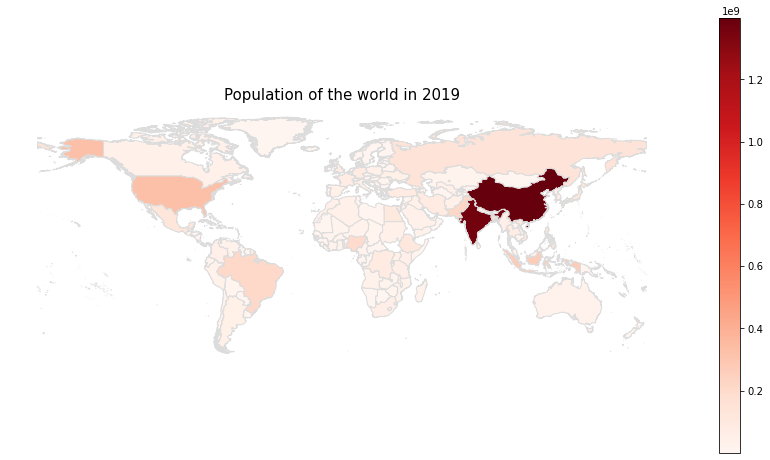

In [47]:
ax = country_pop.plot(figsize=(15,8), column='2019', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2019', fontsize=15);
ax.axis(False)

# -> We can see that India's map became darker
# -> Some countries color became darker, while some just retained

<AxesSubplot:>

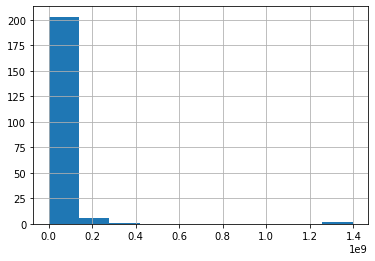

In [48]:
country_pop['2019'].hist()
# -> Highly skewed to the left
# -> Outliers: India and China
# -> We might want to do some logarithmic scale transformation

In [49]:
# Let's drop the rows with NaN's so we can actually see the population distribution arcoss the world
country_pop.dropna(axis=0, how='any', inplace=True)
country_pop.shape

(209, 67)

'\nSTEPS:\n'

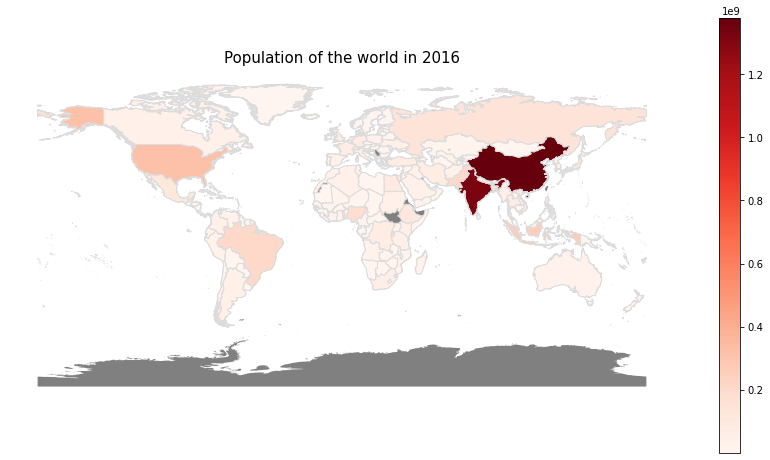

In [51]:
ax = world.plot(figsize=(15,8), color='gray')
country_pop.plot(ax=ax, column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15)
ax.axis('off');

# -> When we dropped the null values,their colors are removed
# -> Those in the middle of Africa may be missing data

'''
STEPS:
1. Plot the base map first. 
2. Assign it on an axis object.
'''

# -> This is a normal Geopandas attribute join because we joined on a column
# that is textual

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

In [88]:
gpd.sjoin?

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    predicate='intersects',
    lsuffix='left',
    rsuffix='right',
    **kwargs,
)
Docstring:
Spatial join of two GeoDataFrames.

See the User Guide page :doc:`../../user_guide/mergingdata` for details.


Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
predicate : string, default 'intersects'
    Binary predicate. Valid values are determined by the spatial index used.
    You can check the valid values in left_df or right_df as
    ``left_df.sindex.valid_query_predicates`` or
    ``right_df.sindex.valid_query_predicates``
    Replaces deprecated ``op`` parameter.
lsuffix : string, default 'left'
    Suffix to apply to

#### Data Cleaning through Spatial Join
Another useful purpose of a spatial join is to clean out erroneous data or exclude data from the study area. From our previous example of the Citibike stations and NYC taxi zones, we can now remove the erroneous data from the NYC study area.

In [90]:
# This spatial join will return the points within a polygon
# The basic question answered here is "in which taxi zone is the station located?"
stations_within = gpd.sjoin(citi_gdf, taxi, predicate='within')
stations_within.head()

,end station name,end station longitude,end station latitude,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,Washington Park,-73.973730,40.691782,POINT (991535.068 191312.655),96,97,0.062476,0.000163,Fort Greene,97,Brooklyn
71,Clinton Ave & Myrtle Ave,-73.968896,40.693261,POINT (992875.391 191851.831),96,97,0.062476,0.000163,Fort Greene,97,Brooklyn
100,Cumberland St & Lafayette Ave,-73.972652,40.687534,POINT (991834.519 189764.986),96,97,0.062476,0.000163,Fort Greene,97,Brooklyn
232,Carlton Ave & Park Ave,-73.973556,40.695807,POINT (991582.934 192779.007),96,97,0.062476,0.000163,Fort Greene,97,Brooklyn
289,Carlton Ave & Flushing Ave,-73.973736,40.697787,POINT (991532.716 193500.347),96,97,0.062476,0.000163,Fort Greene,97,Brooklyn


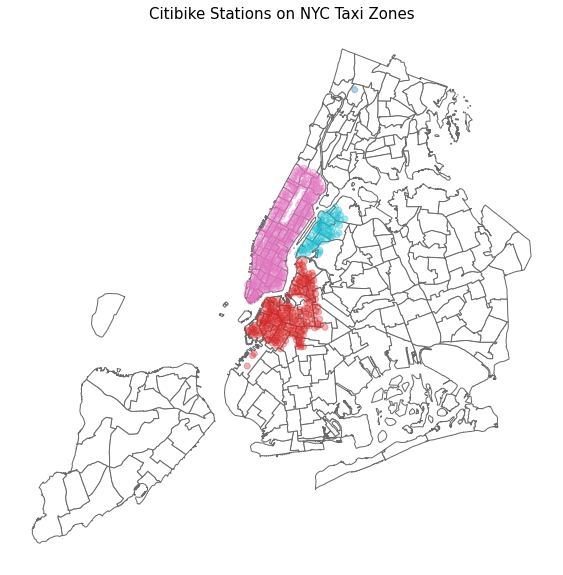

In [107]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
stations_within.plot(ax=ax, column='borough', alpha=0.35)
ax.set_title('Citibike Stations on NYC Taxi Zones', fontsize=15)
ax.axis('off');

In [93]:
# This spatial will return the polygons that contain points
# The basic question answered here is "which taxi zones have citibike stations?"
zones_with_stations = gpd.sjoin(taxi, citi_gdf, predicate='contains')
zones_with_stations.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,index_right,end station name,end station longitude,end station latitude
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",692,Avenue D & E 3 St,-73.977932,40.720828
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",39,E 2 St & Avenue C,-73.980858,40.720874
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",717,E 6 St & Avenue D,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4268,E 5 St & Avenue C,-73.979955,40.722992
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",300,Avenue D & E 8 St,-73.975748,40.723684


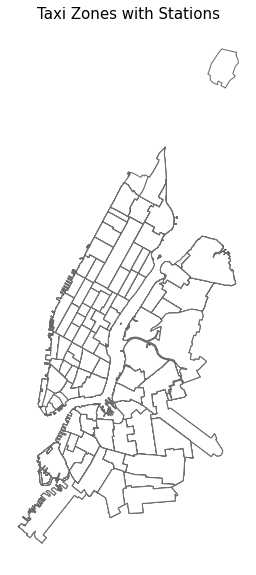

In [94]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
zones_with_stations.plot(ax=ax, color='white', edgecolor='dimgray')
ax.set_title('Taxi Zones with Stations', fontsize=15)
ax.axis('off');

In [99]:
zones_station_count = zones_with_stations.groupby('zone')['OBJECTID'].count().reset_index()
zones_station_count.columns = ['zone', 'station_count']
zones_station_count.head()

,zone,station_count
0,Alphabet City,8
1,Astoria,21
2,Astoria Park,2
3,Battery Park,1
4,Battery Park City,5


In [100]:
zones_counts = taxi.merge(zones_station_count, on='zone')
zones_counts

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,station_count
0,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",8
1,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",21
2,8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276 221686.466, 1005304.898 ...",2
3,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.772 196066.565, 979980.852 19...",1
4,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.310 201248.869, 980697.386 20...",5
...,...,...,...,...,...,...,...,...
88,255,0.062384,0.000172,Williamsburg (North Side),255,Brooklyn,"POLYGON ((994849.011 203499.267, 994911.093 20...",16
89,256,0.067915,0.000169,Williamsburg (South Side),256,Brooklyn,"POLYGON ((995798.638 199155.970, 996223.601 19...",10
90,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",2
91,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",5


<AxesSubplot:>

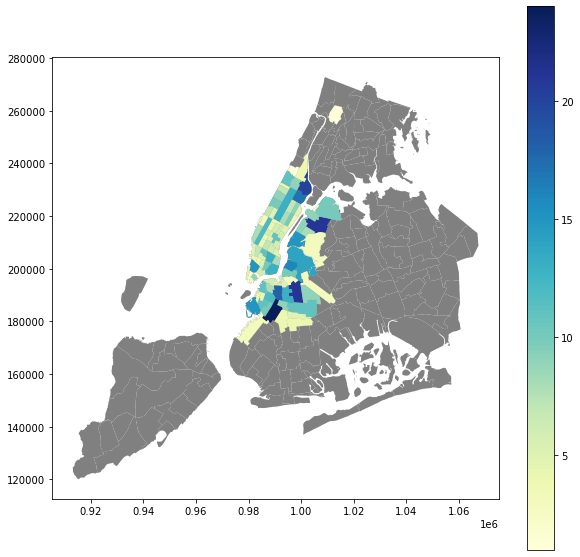

In [106]:
ax = taxi.plot(figsize=(10, 10), color='gray')
zones_counts.plot(ax=ax, column='station_count', cmap=plt.cm.YlGnBu, legend=True)

In [108]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


In [109]:
healthsites.head()

,source_url,what3words,upstream,name,completeness,uuid,date_modified,source,version,type,physical-address,phone,email,url,defining-hours,geometry
0,http://www.openstreetmap.org/node/2694351354,chat.pints.mankind,openstreetmap¶n2694351354,20-1 Barangay Health Station,35.29%,e32de8829d524d60b40a55a2029b765f,2015-11-17T09:43:57.838001+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (121.13735 14.56600)
1,http://www.openstreetmap.org/node/2141277725,shadow.vipers.modest,openstreetmap¶n2141277725,24hr Birthing Center,35.29%,116f9d20caa946ea969796092d79b0dc,2015-11-17T09:43:57.838001+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (123.94312 10.33793)
2,http://www.openstreetmap.org/node/4020825463,caravan.flint.evicted,OpenStreetMap¶n4020825463,4m ultrasound,29.41%,6cbffaf7de0b49bd81eb99b58d291206,2016-02-26T15:58:36+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (125.97913 8.50781)
3,http://www.openstreetmap.org/way/317862375,wildest.progress.chirped,openstreetmap¶w317862375,7thDayAdventistSanitariumHospital,35.29%,3225787941ba40e7ab8c81514ec1a16f,2015-12-11T10:51:22.924000+00:00,OpenStreetMap,2,hospital,None,None,None,None,None,POINT (124.56608 12.06808)
4,http://www.openstreetmap.org/way/266959244,chug.redhead.quickness,openstreetmap¶w266959244,81752,35.29%,ceaf253f77044fd28035a65bdb91ed14,2015-12-11T10:51:22.924000+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (120.23383 14.87967)


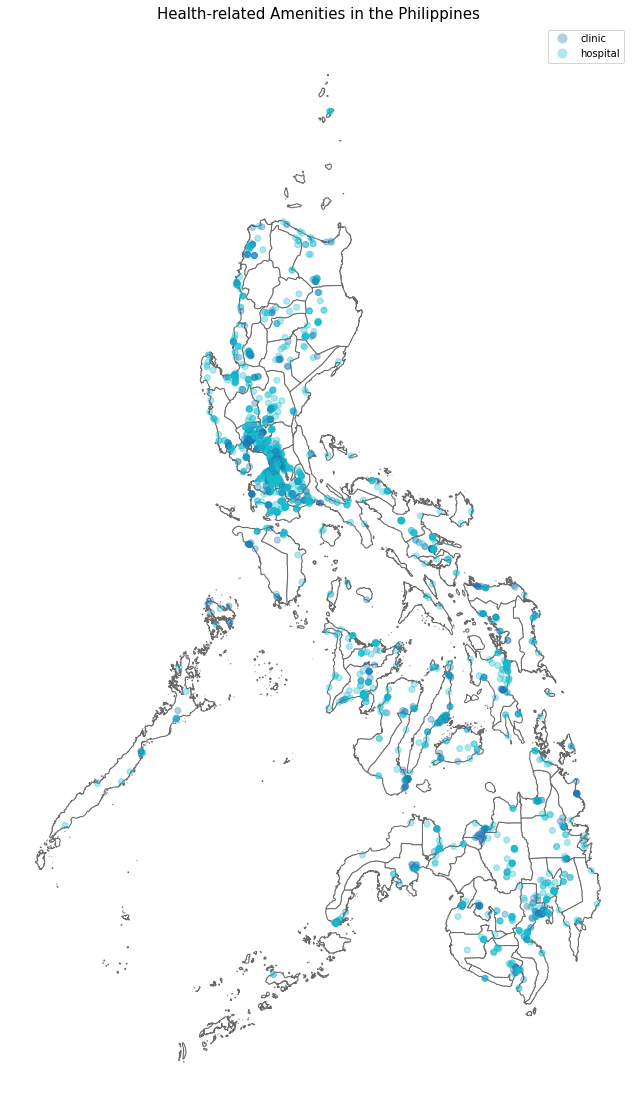

In [110]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="type", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [111]:
healthsites.describe(include=np.object)

C:\Users\Unisse\AppData\Local\Temp/ipykernel_28704/323902504.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  healthsites.describe(include=np.object)


,source_url,what3words,upstream,name,completeness,uuid,date_modified,source,type,physical-address,phone,email,url,defining-hours
count,2636,2636,2636,2636,2636,2636,2636,2636,2636,514,26,18,28,1
unique,2628,2619,2628,2388,4,2628,755,1,2,425,22,14,27,1
top,http://www.openstreetmap.org/node/2808044553,tacit.premiums.overlay,openstreetmap¶n2808044553,Health Center,35.29%,ce7af940b9b940e8bdbe04ff0aa447c7,2015-12-11T10:51:22.924000+00:00,OpenStreetMap,hospital,Manila,0434160446,jabezmedicalcenter@gmail.com,http://hapihap.com,"-,-,-,-,-,-,-,"
freq,2,2,2,37,1791,2,1053,2636,1817,19,3,3,2,1


In [112]:
healthsites.isna().sum()

source_url             0
what3words             0
upstream               0
name                   0
completeness           0
uuid                   0
date_modified          0
source                 0
version                0
type                   0
physical-address    2122
phone               2610
email               2618
url                 2608
defining-hours      2635
geometry               0
dtype: int64

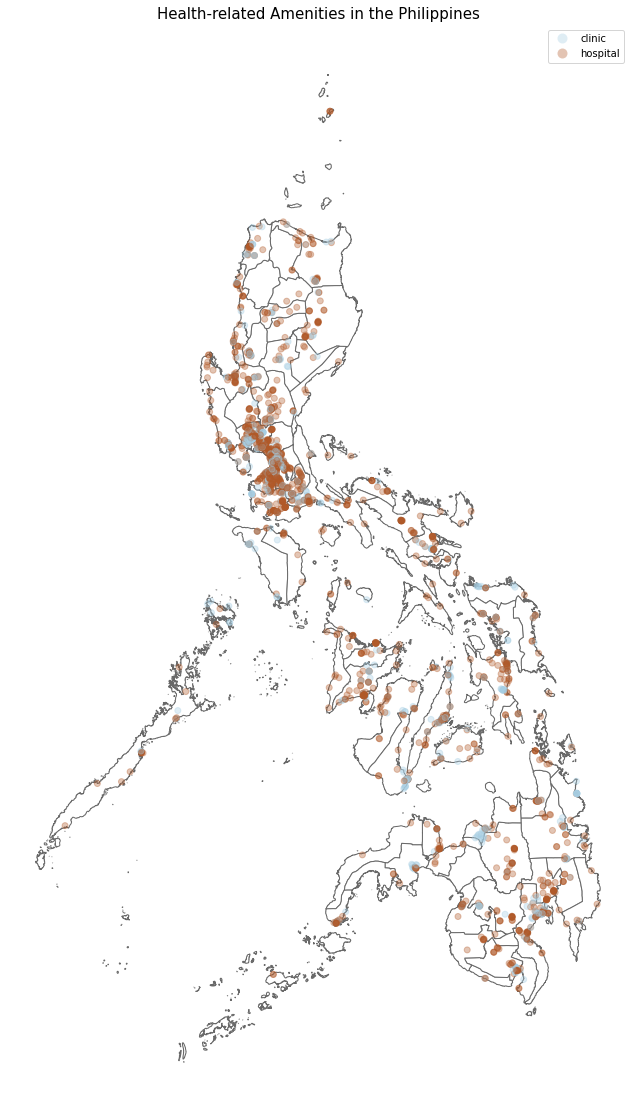

In [113]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="type", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

This figure shows....

<AxesSubplot:>

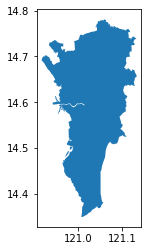

In [114]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.